In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 29 14:12:29 2021

@author: MON
# | Title         | Test af tilgange til evaluering af konvergens i ProcesOptimizer   |
# |---------------|---------------------------------------------|
# | Assignment    | Boost Væksten projektet                     |
# | Author        | MON                                         |
# | QA            |                                             |
# | Creation date | 29/09/2021                                  |
# | Environment   | BoostV_20210929                             |
# | Purpose       | Udvikling af konvergensplot til Brownie Bee |
"""
#%% Importer relevante pakker

import matplotlib.pyplot as plt
import numpy as np
import os
from ProcessOptimizer import Optimizer
from ProcessOptimizer.utils import expected_minimum, y_coverage
from ProcessOptimizer.plots import dependence, plot_expected_minimum_convergence
%load_ext autoreload
%autoreload 2
#%pylab nbagg

#%% Øvrige metoder
# Vores "target" er at skyde 574 cm, og vores score er derfor den absolutte 
# afstand til denne længde
target = 329
def score(target,result):
    return abs(target-result)
# Metode til at finde hvor meget af y-aksen vi bruger
def y_mag(res,x_loc):
    y_mag = np.zeros(len(x_loc))
    for i in range(len(x_loc)):
        y = dependence(res.space,res.models[-1],i,x_eval=x_loc)
        y = np.array(y[1])
        y_mag[i] = y.max() - y.min()
    return y_mag

#%% Byg vores optimizer

# Først defineres vores parameterrum til optimering af en virtuel katapult som
# kan findes på hjemmesiden sigmazone.com/catapult. Grænserne repræsenterer den
# højre elastik, venstre elastik, kop-højde og pin-vinkel. Der skydes altid med
# den maksimalt mulige kraft (pullback)
space = [(100.0,200.0), (100.0,200.0), (200.0,300.0), (90.0,140.0)]
# Vi definerer antal indledende punkter til 5
n_init = 5

# Byg optimizer objektet, med Xi = 50
opt = Optimizer(space,n_initial_points=n_init,acq_func_kwargs={'xi': 50})

# Bed om de første fem punkter
next_x = opt.ask(5)
# Outputtet er:
 #[[130.0, 170.0, 210.0, 105.0],
 # [190.0, 150.0, 250.0, 135.0],
 # [150.0, 130.0, 230.0,  95.0],
 # [110.0, 110.0, 270.0, 115.0],
 # [170.0, 190.0, 290.0, 125.0]]
 
# Fortæl resultatet af disse fem indstillinger til optimizeren
res = opt.tell(next_x[0],score(target,216))
res = opt.tell(next_x[1],score(target,320))
res = opt.tell(next_x[2],score(target,182))
res = opt.tell(next_x[3],score(target,211))
res = opt.tell(next_x[4],score(target,491))

# Forbered lister til at gemme positionen af det forventede minimum, dets værdi
# og usikkerhed, samt hvor meget af y-aksen vi "bruger" langs hver dimension
# når vi kigger langs hver faktor ved det forventede minimum
em_loc = []
em_val = []
y_span = []

# Beregn expected minimum og dennes usikkerhed
x_loc, vals = expected_minimum(res,return_std=True)
# Gem position og værdi/usikkerhed af expected minimum
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 6
next_x = opt.ask(1) # [191.0, 149.0, 251.0, 131.0]
# Hard-code next_x for reproducibilitet
next_x = [191.0, 149.0, 251.0, 131.0]

# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,341))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 7
next_x = opt.ask(1) # [199.0, 161.0, 241.0, 140.0]
# Hard-code next_x for reproducibilitet
next_x = [199.0, 161.0, 241.0, 140.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,264))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 8
next_x = opt.ask(1) # [138.0, 150.0, 300.0, 140.0]
# Hard-code next_x for reproducibilitet
next_x = [138.0, 150.0, 300.0, 140.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,233))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 9
next_x = opt.ask(1) # [182.0, 149.0, 300.0, 140.0]
# Hard-code next_x for reproducibilitet
next_x = [182.0, 149.0, 300.0, 140.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,326))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 10
next_x = opt.ask(1) # [199.0, 143.0, 300.0, 140.0]
# Hard-code next_x for reproducibilitet
next_x = [199.0, 143.0, 300.0, 140.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,345))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 11
next_x = opt.ask(1) # [181.0, 142.0, 256.0, 140.0]
# Hard-code next_x for reproducibilitet
next_x = [181.0, 142.0, 256.0, 140.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,240))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 12
next_x = opt.ask(1) # [200.0, 152.0, 300.0, 140.0]
# Hard-code next_x for reproducibilitet
next_x = [200.0, 152.0, 300.0, 140.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,358))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 13
next_x = opt.ask(1) # [181.0, 154.0, 300.0, 106.0]
# Hard-code next_x for reproducibilitet
next_x = [181.0, 154.0, 300.0, 106.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,438))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

### HERTIL

#%% Skud nummer 14
next_x = opt.ask(1) # [166.0, 200.0, 300.0, 116.0]
# Hard-code next_x for reproducibilitet
next_x = [166.0, 200.0, 300.0, 116.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,538))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 15
next_x = opt.ask(1) # [100.0, 200.0, 300.0, 90.0]
# Hard-code next_x for reproducibilitet
next_x = [100.0, 200.0, 300.0, 90.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,207))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 16
next_x = opt.ask(1) # [181.0, 200.0, 300.0, 119.0]
# Hard-code next_x for reproducibilitet
next_x = [181.0, 200.0, 300.0, 119.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,583))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]

#%% Skud nummer 17
next_x = opt.ask(1) # [179.0, 200.0, 300.0, 116.0]
# Hard-code next_x for reproducibilitet
next_x = [179.0, 200.0, 300.0, 116.0]
# Giv resultatet til optimizeren
res = opt.tell(next_x,score(target,569))
# Nyt forventet minimum, gem til vores liste
x_loc, vals = expected_minimum(res,return_std=True)
em_loc += [x_loc]
em_val += [vals]
y_span += [y_mag(res,x_loc)]


[[190.02935949198252, 149.99408118026105, 249.97870497614224, 135.00984102941072], [189.7103784130024, 150.73215692188583, 248.88969984657547, 139.2096939031695], [189.43563945044258, 147.0093172131971, 248.77863599625002, 136.5309090322423], [188.60553837629618, 149.27806862840885, 250.1661133053841, 137.18683366206878], [185.17119682134526, 149.16894023958673, 279.6270948890017, 140.0], [186.79640500578495, 148.48616568647745, 280.38752812187244, 140.0], [196.64308889599425, 149.61750480401102, 300.0, 138.98506428498845], [185.89822793336026, 150.26328520765435, 297.40144802372254, 138.503818862849], [189.35933937879625, 138.98251978342637, 300.0, 140.0], [189.69794237486227, 140.432245892485, 300.0, 140.0], [189.73555270005326, 140.37452129404244, 299.58992123875237, 140.0], [188.77974892609092, 148.7800166359908, 294.1335361638579, 139.13330959376572], [189.5074073723255, 148.36542411402897, 296.02187445470594, 137.23879493026755]]


(0.0, 2.5)

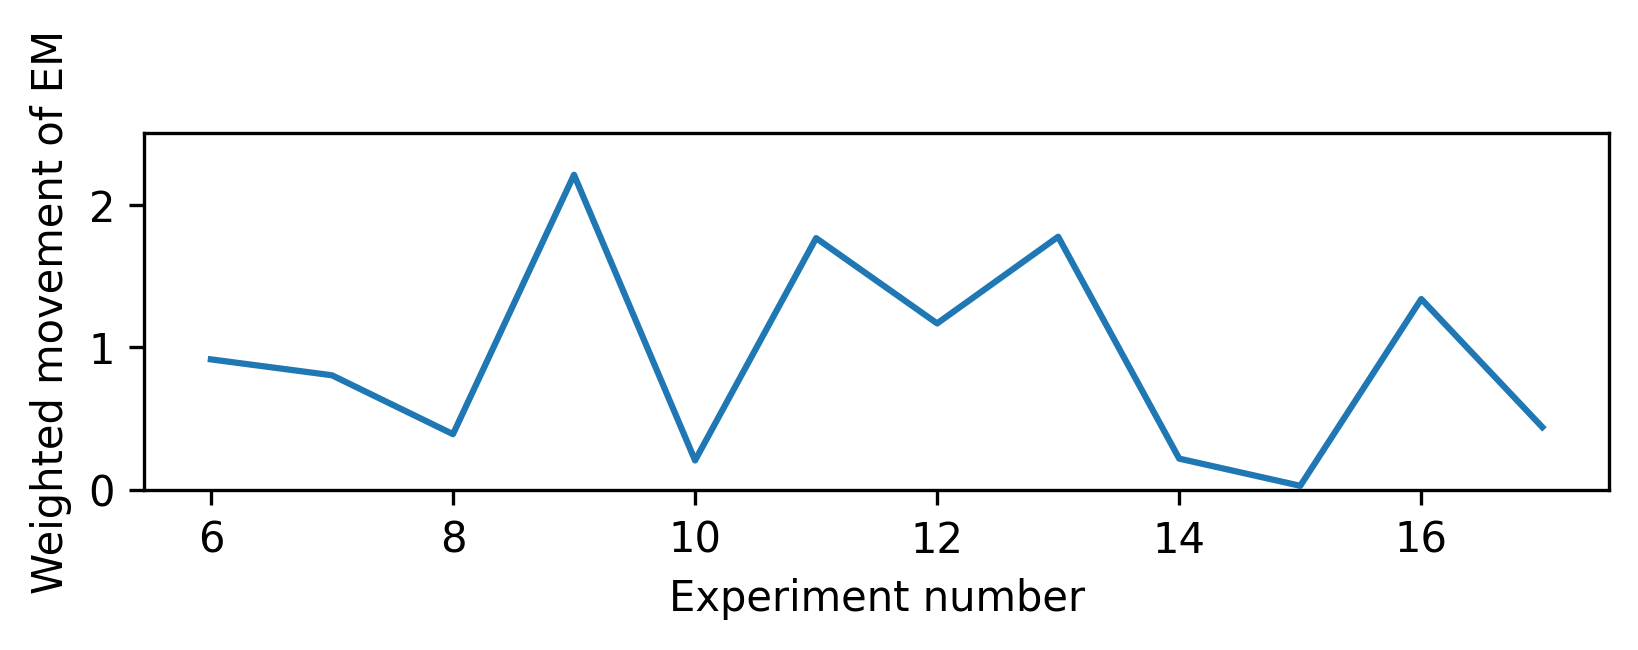

In [15]:

#%% Plot af bevægelse af expected minimum

# Vi kan nu beregne en vægtet metrik for hvor meget minimum har flyttet sig, 
print(em_loc)
# Vi starter med at normalisere positionen af vores expected minimum langs vores akser
em_loc_norm = opt.space.transform(em_loc)
# Beregn nu ændringen langs hver akse for hvert skridt
diff = np.diff(em_loc_norm,axis=0)
# Lav en vægtet sum af de kvadrerede ændringer, med den nyeste y_span som vægte
em_change_sum = np.sum(np.square(diff)*y_span[-1],axis=1)
# Beregn bevægelsen ved at tage kvadratroden af den vægtede sum
em_change = np.sqrt(em_change_sum)

fig = plt.figure(figsize = (16/2.54, 4/2.54),dpi=300)
ax = plt.axes()
ax.plot(range(n_init+1,len(em_change)+n_init+1),em_change)
ax.set_xlabel("Experiment number")
ax.set_ylabel("Weighted movement of EM")
ax.set_ylim(0,2.5)



In [16]:
em_change

array([0.91670657, 0.80535742, 0.39253731, 2.21020452, 0.20852232,
       1.76653746, 1.16877053, 1.77622299, 0.22108229, 0.03066906,
       1.33976355, 0.44152604])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
10


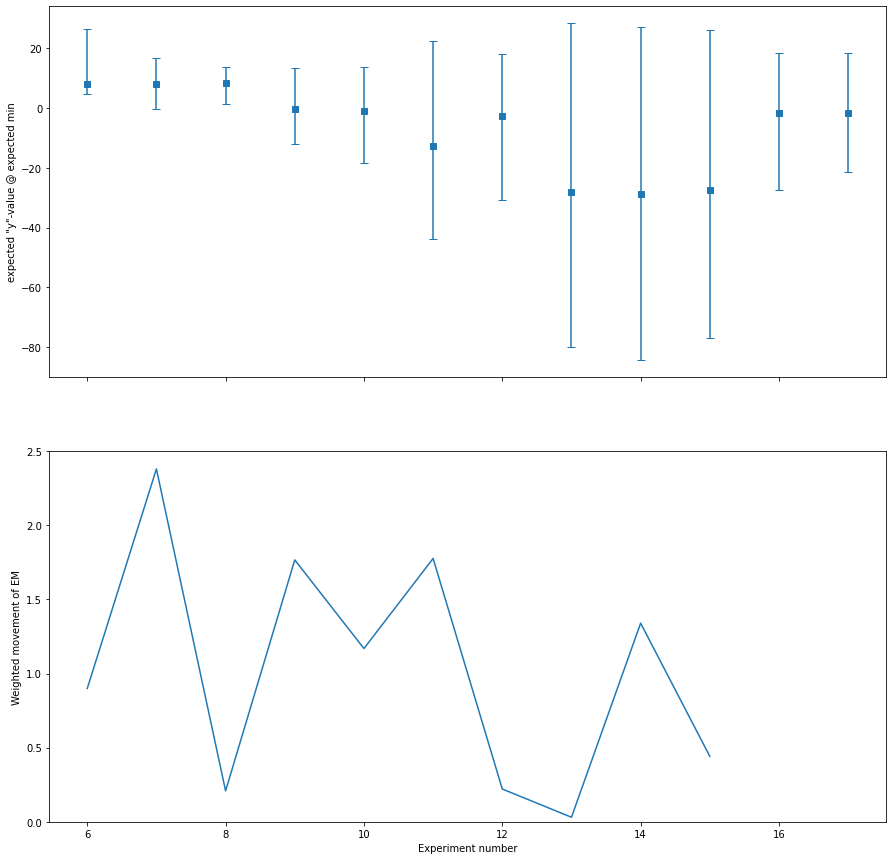

In [23]:
%load_ext autoreload
%autoreload 2

_ = plot_expected_minimum_convergence(res,5)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
10


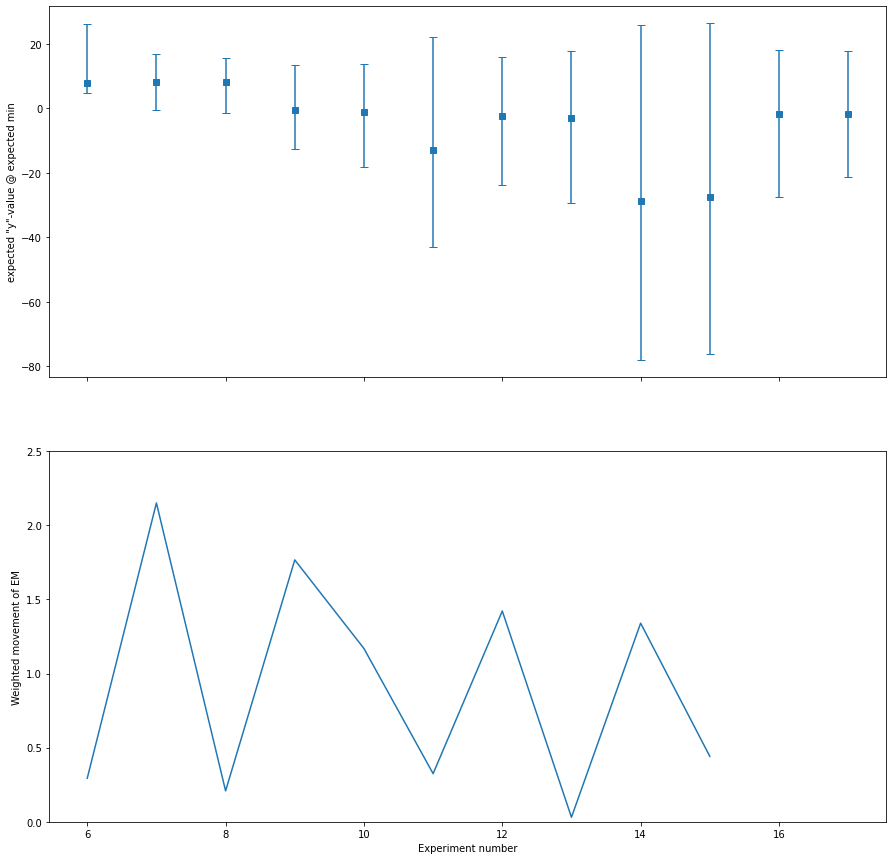

In [31]:
%load_ext autoreload
%autoreload 2

_ = plot_expected_minimum_convergence(res,5)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


[4, 5, 6, 7, 8, 9]